In [1]:
##############################################################
#  WARNING, EXECUTE THIS LINE BEFORE EXEsCUTING ANY ROS CODE #
#                                                            #
#             source opt/ros/foxy/setup.bash                 #
#                                                            #
##############################################################

In [2]:
from __future__ import absolute_import, division, print_function# need to undestend their utility <-------- UNKNOWN
import tensorflow as tf
import keras# dont import keras ftom tensorflow library otherwise the code below will fail
from sklearn.model_selection import train_test_split
import numpy as np
from keras_visualizer import visualizer# used to visualize the neural network <-------------------- MORE INFORMATION
from tensorflow.keras.utils import plot_model# used to plot the neural network model <------------------MORE INFO
import matplotlib.pyplot as plt# this library will be used for data visualization

try:
    import tqdm# import trange# used for progress bar visualization
except:
    print("\n\n ATTENZIONE, TI MANCA LA LIBRERIA tqdm PER LA VISUALIZZAZIONE DEL PROGRESSO NEI CICLI FOR. PER INSTALLARLA DIGITA 'sudo pip3 install tqdm'")
    
TestSize = 0.1# size of the test set

percent = 0.8# percentage of data we want to give to our system from all the data aveilable
# we start to take them from the start of the dataset , one after one)

LukyNumber = 4# the number that in this session will be associated to 1 while the others will be set to 0
# (we set all the other numbers to zero becouse otherwise the neural network behave incorrectly with thos libraries)

2022-07-02 15:38:32.344242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-02 15:38:32.344302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# import the dataset "mnist" that contains all the images of the numbers
# and relatives lables an then assine all those data to two sets ( training set and test set )

# adjusting the type of the data contained in the arrays in this way they can be also negative( maybe now it is usless)
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

# i have to scale the brightness of each pixel becouse otherwise i saturate the activation function
#(a wise man told me)
x_train = x_train/255
x_test = x_test/255

In [4]:
# I want to see some information about my data and they format
print(type(x_train))# return the typology of our data set of images
print(len(x_train))# retunr the lenth of the data set ( how much images we have )
print(np.shape(x_train))# return the shape of the data set, in our case we have the
# lenth and then the dimensions of the images

print(type(x_test))# return the typology of our training set of images
print(len(x_test))# retunr the lenth of the training set ( how much images we have )
print(np.shape(x_test))# return the shape of the training set, in our case we have the
# lenth and then the dimensions of the images

#print(dir(np))
#print(help(np.concatenate))

<class 'numpy.ndarray'>
60000
(60000, 28, 28)
<class 'numpy.ndarray'>
10000
(10000, 28, 28)


In [5]:
'''                             I HAVE TO CHECK IF THIS PART OF THE CODE IS CORRECT                            '''

#                                    Reduction of the dataset dimension

x_total_temp = np.append(x_train, x_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of x_total_temp: {0}".format(np.shape(x_total_temp)))

x_total = x_total_temp[0: int(np.shape(x_total_temp)[0]*percent)]
print("Shape of x_total reduced to {1}: {0}".format(np.shape(x_total), percent))

y_total_temp = np.append(y_train, y_test, axis=0)# CHECK IF THE PARTS ARE APPENDED CORRECTLY <------------- WARNING
print("Shape of y_total_temp: {0}".format(np.shape(y_total_temp)))

y_total = y_total_temp[0: int(np.shape(y_total_temp)[0]*percent)]
print("Shape of y_total reduced to {1}: {0}".format(np.shape(y_total), percent))

Shape of x_total_temp: (70000, 28, 28)
Shape of x_total reduced to 0.8: (56000, 28, 28)
Shape of y_total_temp: (70000,)
Shape of y_total reduced to 0.8: (56000,)


In [6]:
"""                                       THE ERROR COULD BE HERE                                                """
# Redistribution of the data in two sets ( test and train)
x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=TestSize)

In [7]:
"""                                       THE ERROR COULD BE HERE                                                """
#                                     Assignment of values [1, -1]

# REWRITE THE CODE BECAUSE IT ISNT EFFISCENT ENOUGH (nested for loops or something else)

for i in range(0, np.shape(y_train)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_train[i] == LukyNumber:
        y_train[i] = 1
    else:
        y_train[i] = -1
        
for i in range(0, np.shape(y_test)[0]):# <-------------------------------------------------- WARNING (use iterator)
    if y_test[i] == LukyNumber:
        y_test[i] = 1
    else:
        y_test[i] = -1
print(y_test.dtype)

int8


In [8]:
# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_train : {}\n".format(len(y_train)))
print("Shape of y_train : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

print("Lenth of y_test : {}\n".format(len(y_test)))
print("Shape of y_test : {}\n".format(np.shape(y_test)))
print("y_test : {}\n".format(y_test))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_train : {}\n".format(len(x_train)))
print("Shape of x_train : {}\n".format(np.shape(x_train)))
print("x_train : {}\n".format(x_train))

print("Lenth of x_test : {}\n".format(len(x_test)))
print("Shape of x_test : {}\n".format(np.shape(x_test)))
print("x_test : {}\n".format(x_test))

Lenth of y_train : 50400

Shape of y_train : (50400,)

y_training : [-1 -1 -1 ... -1 -1  1]

Lenth of y_test : 5600

Shape of y_test : (5600,)

y_test : [-1 -1 -1 ...  1 -1  1]

Lenth of x_train : 50400

Shape of x_train : (50400, 28, 28)

x_train : [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0

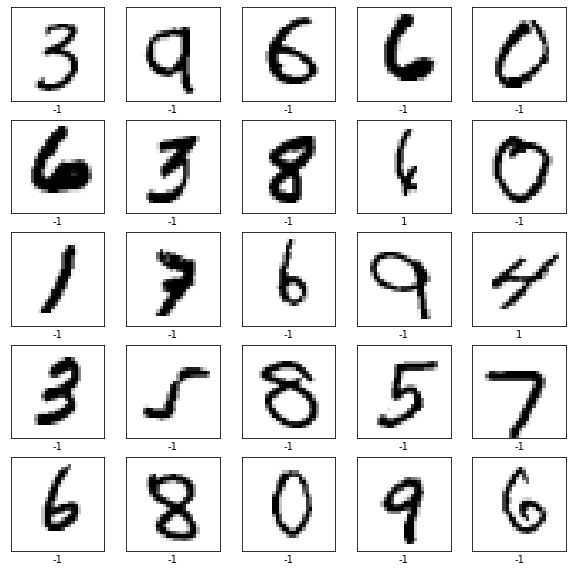

In [9]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(10,10))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(25):# i want to plot 25 images
    plt.subplot(5,5,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(x_train[i], cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(y_train[i])# add the lable associated to that image under it
plt.show()# show all the images

In [10]:
# HERE I RESHAPE THE IMAGES FROM A MATRIX TO A VECTOR MANTAINING THE DATA CONTENT
SrecchedDatasetX = np.reshape(x_train, (np.shape(x_train)[0], 784))# the dataset has 11200 elements, you have to make this part of code more general

# TEST TO SEE THE SHAPE OF THE DATA
print("Lenth of y_training : {}\n".format(len(y_train)))
print("Shape of y_training : {}\n".format(np.shape(y_train)))
print("y_training : {}\n".format(y_train))

# I WANT TO SEE THE SHAPE OF PICTURES
print("Lenth of x_training : {}\n".format(len(SrecchedDatasetX)))
print("Shape of x_training : {}\n".format(np.shape(SrecchedDatasetX)))
print("x_training : {}\n".format(SrecchedDatasetX))

Lenth of y_training : 50400

Shape of y_training : (50400,)

y_training : [-1 -1 -1 ... -1 -1  1]

Lenth of x_training : 50400

Shape of x_training : (50400, 784)

x_training : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]



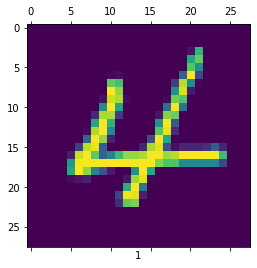

In [11]:
# HERE I TEST THE CONVERSION GOING BACKWARD (CHEKING IF THE IMAGE IS CORRECT)
#print(SrecchedDatasetX[1])
mm = 300
prova = np.reshape(SrecchedDatasetX[mm], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.xlabel(y_train[mm])
plt.show()

# UNTILL HERE THE CODE IS CORRECT <-------------------------------------------------------------- OK

The erlier part was a preprocessing of the data, now we will use distributed gradient traking for the training of the neural network.
-

In [12]:
'''
# labeling change for neural network
correct = np.zeros(784)
correct[0] = 1
wrong = np.zeros(784)
wrong[0] = -1

max_iters = 100# ricordati che questo e' da cambiare sotto
temp_label_point = np.zeros((np.shape(y_train)[0], 784))

for i in range(0, np.shape(y_train)[0]):
    if y_train[i] == 1:
        temp_label_point[i] = correct
        #print("im in 1")
    if y_train[i] == -1:
        temp_label_point[i] = wrong
        #print("im in -1")

print("\n\nDONE!!\n\n")

#print(correct)
#print(wrong)
#print(np.shape(y_train)[0])
#print(label_point[0])

ZeroVector = np.zeros(784+1)
#print(ZeroVector)
'''

'\n# labeling change for neural network\ncorrect = np.zeros(784)\ncorrect[0] = 1\nwrong = np.zeros(784)\nwrong[0] = -1\n\nmax_iters = 100# ricordati che questo e\' da cambiare sotto\ntemp_label_point = np.zeros((np.shape(y_train)[0], 784))\n\nfor i in range(0, np.shape(y_train)[0]):\n    if y_train[i] == 1:\n        temp_label_point[i] = correct\n        #print("im in 1")\n    if y_train[i] == -1:\n        temp_label_point[i] = wrong\n        #print("im in -1")\n\nprint("\n\nDONE!!\n\n")\n\n#print(correct)\n#print(wrong)\n#print(np.shape(y_train)[0])\n#print(label_point[0])\n\nZeroVector = np.zeros(784+1)\n#print(ZeroVector)\n'

In [13]:
ZeroVector = np.zeros(784+1)

In [14]:
# function that returns the average of a sequence of numbers
def moving_average(a, n=64) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [15]:
# here i will redistribute the data in equal sets ( this set will be reduced set )

# solution to hight variance in the cost graph 
# https://towardsdatascience.com/what-to-do-when-your-classification-dataset-is-imbalanced-6af031b12a36

print("Shape of y_training : {}\n".format(np.shape(y_train)))
print("Shape of SrecchedDatasetX : {}\n".format(np.shape(SrecchedDatasetX)))

print("Shape of y_testing (not converted): {}\n".format(np.shape(y_test)))# these can be overlooked
print("Shape of x_testing (not converted): {}\n".format(np.shape(x_test)))# these can be overlooked

LenthOfArray = 100# half length of the array containing the vectorized images
BalancedArray = np.zeros([2*LenthOfArray, 784])# vector containing vectorized images
BalancedLable = np.zeros([2*LenthOfArray])# cevtor containing lables
OnesVector = np.zeros([LenthOfArray, 784])# vector containing vectorized images with lable = 1
OnesLable = np.ones([LenthOfArray])# vector containing lables = 1
NegativeOnesVector = np.zeros([LenthOfArray, 784])# vector containing vectorized images with lable = -1
NegativeOnesLable = -np.ones([LenthOfArray])# vector containing lables = -1

LenthOfArrayPlus = LenthOfArray-1# it is a counter for while cycle (used for positions in the final array)
LenthOfArrayMinus = LenthOfArray-1# it is a counter for while cycle (used for positions in the final array)

CounterPlus = 0# it is a counter for while cycle (used for positions in the old array)
CounterMinus = 0# it is a counter for while cycle (used for positions in the old array)

while LenthOfArrayPlus>-1:
    if (y_train[CounterPlus] == 1):
        #print("ciao1 {}\n".format(LenthOfArrayPlus))
        OnesVector[LenthOfArrayPlus] = SrecchedDatasetX[CounterPlus]
        LenthOfArrayPlus = LenthOfArrayPlus - 1
    CounterPlus = CounterPlus + 1
        
while LenthOfArrayMinus>-1:
    if (y_train[CounterMinus] == -1):
        #print("ciao-1 {}\n".format(LenthOfArrayMinus))
        NegativeOnesVector[LenthOfArrayMinus] = SrecchedDatasetX[CounterMinus]
        LenthOfArrayMinus = LenthOfArrayMinus - 1
    CounterMinus = CounterMinus + 1

# positive
for i in range(0, LenthOfArray):
    #print(2*i)
    BalancedArray[2*i] = OnesVector[i]
    BalancedLable[2*i] = OnesLable[i]

# negative
for i in range(0, LenthOfArray):
    #print(2*i-1)
    BalancedArray[2*i-1] = NegativeOnesVector[i]
    BalancedLable[2*i-1] = NegativeOnesLable[i]    

print("\ndone\n")

Shape of y_training : (50400,)

Shape of SrecchedDatasetX : (50400, 784)

Shape of y_testing (not converted): (5600,)

Shape of x_testing (not converted): (5600, 28, 28)


done



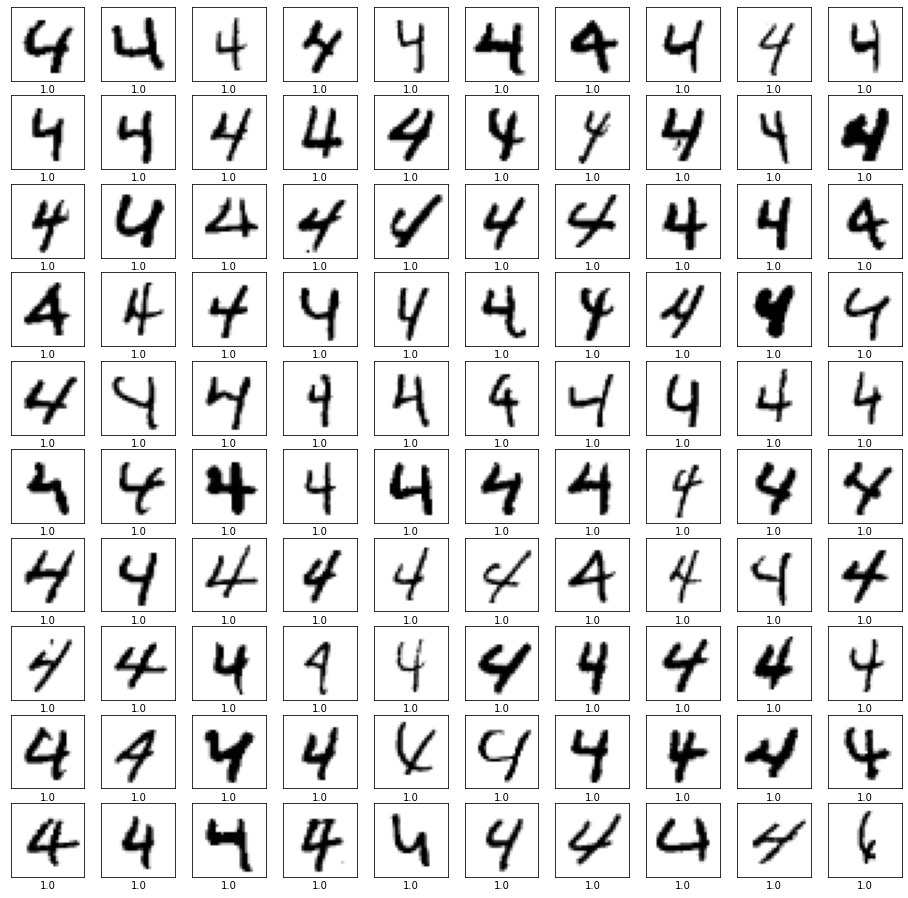

In [16]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(16,16))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(100):# i want to plot 25 images
    plt.subplot(10,10,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(np.reshape(OnesVector[i], (28, 28)), cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(OnesLable[i])# add the lable associated to that image under it
plt.show()# show all the images

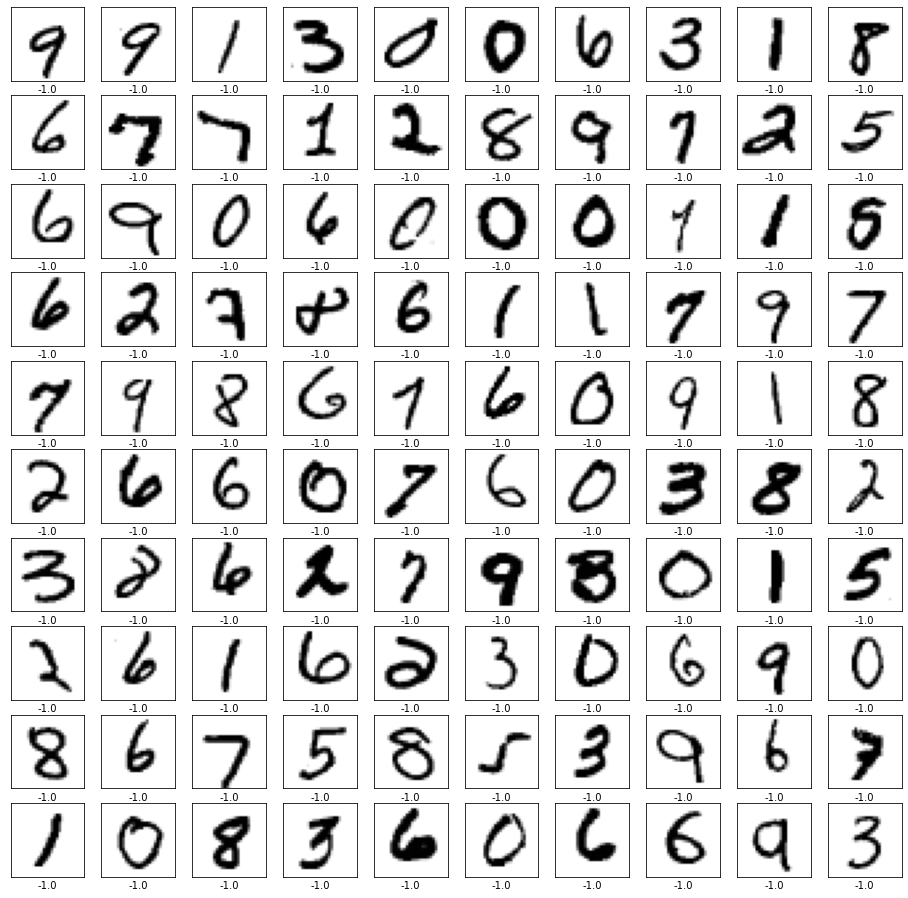

In [17]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(16,16))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(100):# i want to plot 25 images
    plt.subplot(10,10,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(np.reshape(NegativeOnesVector[i], (28, 28)), cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(NegativeOnesLable[i])# add the lable associated to that image under it
plt.show()# show all the images

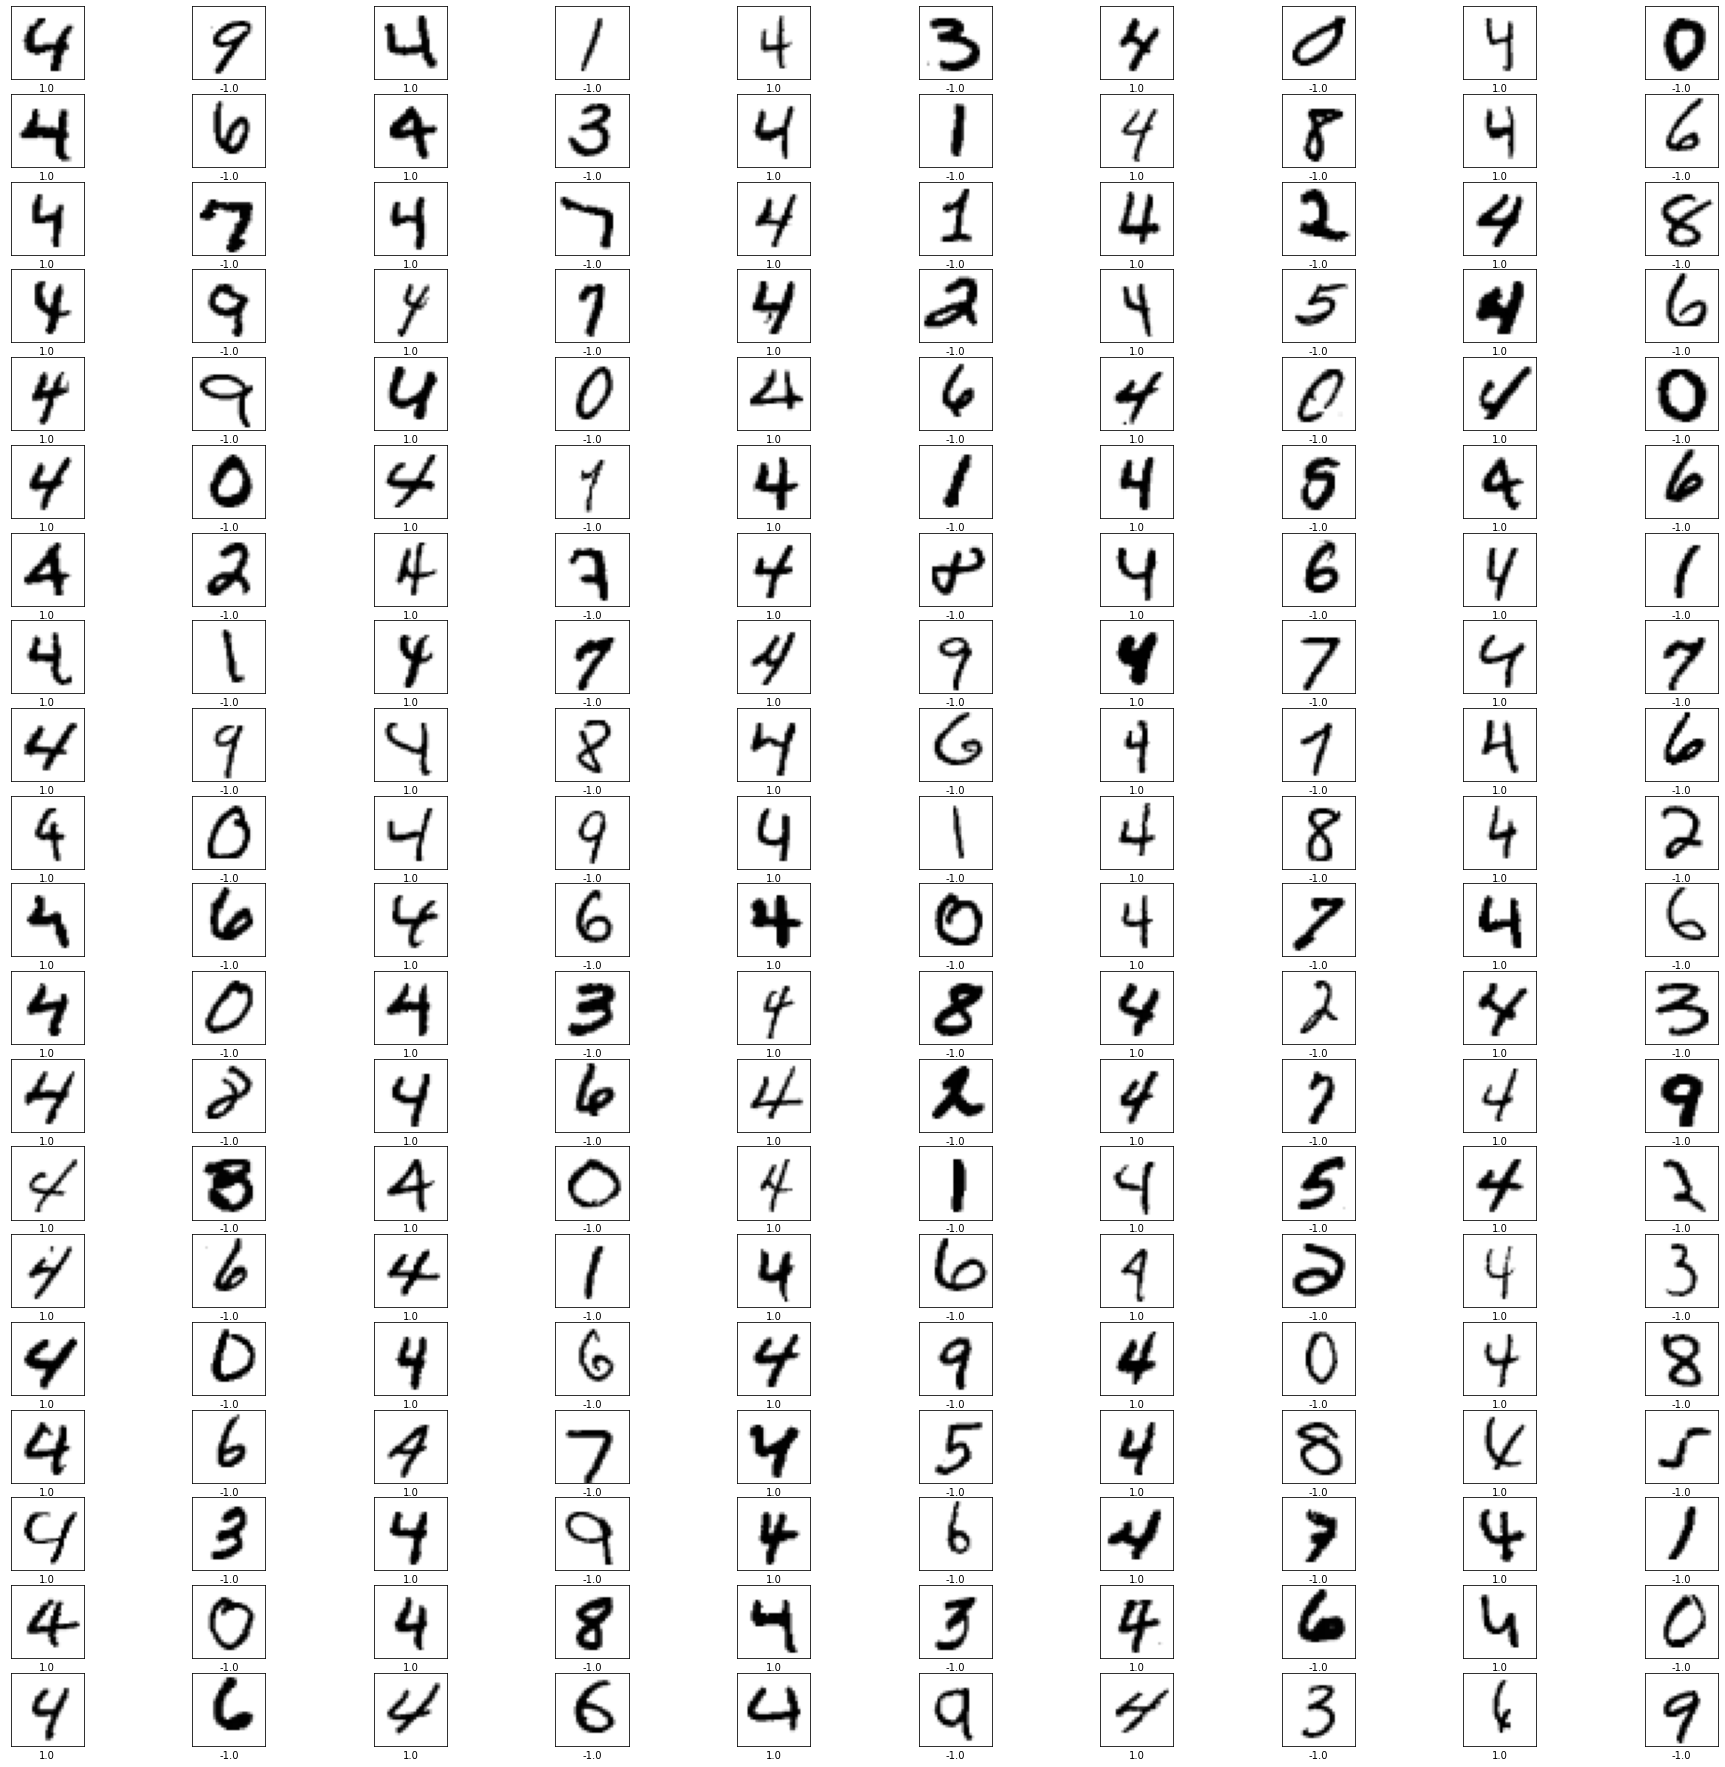

In [18]:
# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(32,32))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(200):# i want to plot 25 images
    plt.subplot(20,10,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(np.reshape(BalancedArray[i], (28, 28)), cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(BalancedLable[i])# add the lable associated to that image under it
plt.show()# show all the images

In [19]:

np.random.seed(0)

###############################################################################

T = 4 # Layers
d = 784  # Number of neurons in each layer. Same numbers for all the layers

# Training Set
#label_point = temp_label_point[0] # D = x0 # <-------------------------------------------------- Warning, change it
#label_point = label_point[0]

#label_point = BalancedLable
#data_point = BalancedArray# vectorized image

# Gradient Method Parameters
max_iters = 2000 # epochs
stepsize = 0.001 # learning rate


label_point = np.zeros(max_iters)
data_point = np.zeros([max_iters, 784])
# questa cosa non va bene, serve solo per il debugghing
for i in range(0, max_iters):
    label_point[i] = BalancedLable[i%200]
    data_point[i] = BalancedArray[i%200]


###############################################################################
# Activation Function

DecisionVAriable = False
'''
def sigmoid_fn(xi):
    return 1/(1+np.exp(-xi))

# Derivative of Activation Function
def sigmoid_fn_derivative(xi):
    return sigmoid_fn(xi)*(1-sigmoid_fn(xi))
'''


def sigmoid_fn(xi):# tanh
    return (np.exp(xi) - np.exp(-xi)) / (np.exp(xi) + np.exp(-xi))

def sigmoid_fn_derivative(xi):# tanh_derivative
    return (2/(np.exp(xi)+np.exp(-xi)))**2


# Inference: x_tp = f(xt,ut)
def inference_dynamics(xt,ut):
    """
        input: 
              xt current state
              ut current input
        output: 
              xtp next state
    """
    xtp = np.zeros(d)
    for ell in range(d):
        temp = xt@ut[ell,1:] + ut[ell,0] # including the bias

        xtp[ell] = sigmoid_fn( temp ) # x' * u_ell
  
    return xtp

# Forward Propagation
def forward_pass(uu,x0):
    """
        input: 
              uu input trajectory: u[0],u[1],..., u[T-1]
              x0 initial condition
        output: 
              xx state trajectory: x[1],x[2],..., x[T]
    """
    xx = np.zeros((T,d))
    xx[0] = x0

    for t  in range(T-1):
        xx[t+1] = inference_dynamics(xx[t],uu[t]) # x^+ = f(x,u)

    return xx
  


# Adjoint dynamics: 
#   state:    lambda_t = A.T lambda_tp
#   output: deltau_t = B.T lambda_tp
def adjoint_dynamics(ltp,xt,ut):
    """
        input: 
              llambda_tp current costate
              xt current state
              ut current input
        output: 
              llambda_t next costate
              delta_ut loss gradient wrt u_t
    """
    df_dx = np.zeros((d,d))

    # df_du = np.zeros((d,(d+1)*d))
    Delta_ut = np.zeros((d,d+1))

    for j in range(d):
        dsigma_j = sigmoid_fn_derivative(xt@ut[j,1:] + ut[j,0]) 

        df_dx[:,j] = ut[j,1:]*dsigma_j
        # df_du[j, XX] = dsigma_j*np.hstack([1,xt])
    
        # B'@ltp
        Delta_ut[j,0] = ltp[j]*dsigma_j
        Delta_ut[j,1:] = xt*ltp[j]*dsigma_j
  
    lt = df_dx@ltp # A'@ltp
    # Delta_ut = df_du@ltp

    return lt, Delta_ut

# Backward Propagation
def backward_pass(xx,uu,llambdaT):
    """
        input: 
              xx state trajectory: x[1],x[2],..., x[T]
              uu input trajectory: u[0],u[1],..., u[T-1]
              llambdaT terminal condition
        output: 
              llambda costate trajectory
              delta_u costate output, i.e., the loss gradient
    """
    llambda = np.zeros((T,d))
    llambda[-1] = llambdaT

    Delta_u = np.zeros((T-1,d,d+1))

    for t in reversed(range(T-1)): # T-2,T-1,...,1,0
        llambda[t], Delta_u[t] = adjoint_dynamics(llambda[t+1],xx[t],uu[t])

    return Delta_u

  
###############################################################################
# MAIN
###############################################################################

J = np.zeros(max_iters)                       # Cost

# Initial Weights / Initial Input Trajectory
uu = -np.random.randn(T-1, d, d+1)# there is d+1 becouse we have bias in each node

# Initial State Trajectory
xx = forward_pass(uu,data_point[0]) # T x d


# forcing the last layer
for i in range(1, np.shape(uu)[1]):
    uu[np.shape(uu)[0]-1][i]=ZeroVector
print("Riassegnamento {0}".format(uu[np.shape(uu)[0]-1][0:3]))


# GO!
for k in range(max_iters):
    #if k%4 == 0:
    print('Cost at k={:d} is {:.10f} lable: {}'.format(k,J[k-1], label_point[k]))
   
    # Initial State Trajectory
    xx = forward_pass(uu,data_point[k]) # T x d

    # Backward propagation
    llambdaT = 2*( xx[-1,:] - label_point[k]) # xT . LambdaT = 2*(-LablePoint)
    Delta_u = backward_pass(xx,uu,llambdaT) # the gradient of the loss function 
  
    # Update the weights
    uu = uu - stepsize*Delta_u # overwriting the old value

    '''
    for i in range(1, np.shape(uu)[1]):
        uu[np.shape(uu)[0]-1][i]=ZeroVector

    print("Riassegnamento {0}".format(uu[np.shape(uu)[0]-1][0:3]))
    print("xx {0}".format(xx[np.shape(xx)[0]-1][0:3]))
    '''


  
    # Forward propagation
    xx = forward_pass(uu,data_point[k])
  
    # Store the Loss Value across Iterations
    J[k] = (xx[-1,:] - label_point[k])@(xx[-1,:] - label_point[k]) # it is the cost at k+1
    # np.linalg.norm( xx[-1,:] - label_point )**2

'''
_,ax = plt.subplots()
AverageCost = moving_average(J, n=64)# here i compute the moving average of the cost vector J
ax.plot(range(max_iters), J, color='r', label='J')
ax.plot(range(len(AverageCost)), AverageCost, color='g', label='avg(J)')
plt.yscale("log")
plt.show()
'''


Riassegnamento [[ 1.22338651 -1.06290038 -1.27139921 ... -1.58171628  0.59934963
   0.19204473]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Cost at k=0 is 0.0000000000 lable: 1.0
Cost at k=1 is 10.4676279688 lable: -1.0
Cost at k=2 is 8.0756215631 lable: 1.0
Cost at k=3 is 18.4508999653 lable: -1.0
Cost at k=4 is 11.8081028637 lable: 1.0
Cost at k=5 is 7.5288578913 lable: -1.0
Cost at k=6 is 9.7112309522 lable: 1.0
Cost at k=7 is 16.8364268590 lable: -1.0
Cost at k=8 is 32.2218314730 lable: 1.0
Cost at k=9 is 16.0697018499 lable: -1.0
Cost at k=10 is 17.3681944203 lable: 1.0
Cost at k=11 is 12.2105842949 lable: -1.0
Cost at k=12 is 13.6011754155 lable: 1.0
Cost at k=13 is 21.4511692966 lable: -1.0
Cost at k=14 is 18.8467122979 lable: 1.0
Cost at k=15 is 12.6491781751 lable: -1.0
Cost at k=16 is 23.8779005533 lable: 1.0
Cost at k=17 is 10.6637562547 lable: -1.0
Cost at k=18 is 13.87825

Cost at k=193 is 6.7818932155 lable: -1.0
Cost at k=194 is 12.5389772099 lable: 1.0
Cost at k=195 is 5.8143782918 lable: -1.0
Cost at k=196 is 12.6127482714 lable: 1.0
Cost at k=197 is 15.0840030916 lable: -1.0
Cost at k=198 is 1.7633467401 lable: 1.0
Cost at k=199 is 87.6157648794 lable: -1.0
Cost at k=200 is 2614.6576741797 lable: 1.0
Cost at k=201 is 4.4720520245 lable: -1.0
Cost at k=202 is 52.2922558403 lable: 1.0
Cost at k=203 is 6.0545444543 lable: -1.0
Cost at k=204 is 0.0243037981 lable: 1.0
Cost at k=205 is 4.2066193283 lable: -1.0
Cost at k=206 is 0.4431998918 lable: 1.0
Cost at k=207 is 9.2340461705 lable: -1.0
Cost at k=208 is 24.5187097830 lable: 1.0
Cost at k=209 is 12.6556699813 lable: -1.0
Cost at k=210 is 0.5731734211 lable: 1.0
Cost at k=211 is 4.8624193139 lable: -1.0
Cost at k=212 is 7.2871651761 lable: 1.0
Cost at k=213 is 8.6331170202 lable: -1.0
Cost at k=214 is 0.3300204274 lable: 1.0
Cost at k=215 is 4.3162071699 lable: -1.0
Cost at k=216 is 4.1670736863 lable

Cost at k=390 is 2.8397396941 lable: 1.0
Cost at k=391 is 6.9861064235 lable: -1.0
Cost at k=392 is 1.1245127951 lable: 1.0
Cost at k=393 is 8.5024067518 lable: -1.0
Cost at k=394 is 0.5933204752 lable: 1.0
Cost at k=395 is 6.5264879327 lable: -1.0
Cost at k=396 is 5.1551142199 lable: 1.0
Cost at k=397 is 4.6710813407 lable: -1.0
Cost at k=398 is 2.9281853770 lable: 1.0
Cost at k=399 is 8.1111526196 lable: -1.0
Cost at k=400 is 2497.3685430296 lable: 1.0
Cost at k=401 is 4.2370620224 lable: -1.0
Cost at k=402 is 0.3453440020 lable: 1.0
Cost at k=403 is 5.0386989781 lable: -1.0
Cost at k=404 is 0.1049887402 lable: 1.0
Cost at k=405 is 0.4957621765 lable: -1.0
Cost at k=406 is 4.0323831808 lable: 1.0
Cost at k=407 is 4.7836533383 lable: -1.0
Cost at k=408 is 15.3534770781 lable: 1.0
Cost at k=409 is 4.0190382499 lable: -1.0
Cost at k=410 is 0.0874123284 lable: 1.0
Cost at k=411 is 4.0136900229 lable: -1.0
Cost at k=412 is 1.4017614998 lable: 1.0
Cost at k=413 is 0.4184611107 lable: -1.0


Cost at k=588 is 6.2452114148 lable: 1.0
Cost at k=589 is 0.5549519704 lable: -1.0
Cost at k=590 is 0.0238936335 lable: 1.0
Cost at k=591 is 1.3538439023 lable: -1.0
Cost at k=592 is 4.3491356310 lable: 1.0
Cost at k=593 is 1.7661620155 lable: -1.0
Cost at k=594 is 1.1786579829 lable: 1.0
Cost at k=595 is 5.1233399699 lable: -1.0
Cost at k=596 is 0.6304798414 lable: 1.0
Cost at k=597 is 5.4603457350 lable: -1.0
Cost at k=598 is 4.8031141477 lable: 1.0
Cost at k=599 is 2.0511652923 lable: -1.0
Cost at k=600 is 917.1618389381 lable: 1.0
Cost at k=601 is 4.3256063323 lable: -1.0
Cost at k=602 is 1.3576533961 lable: 1.0
Cost at k=603 is 4.6211526940 lable: -1.0
Cost at k=604 is 0.0051717060 lable: 1.0
Cost at k=605 is 0.0716687749 lable: -1.0
Cost at k=606 is 0.0225435093 lable: 1.0
Cost at k=607 is 4.2419315086 lable: -1.0
Cost at k=608 is 7.0525857615 lable: 1.0
Cost at k=609 is 4.0084931251 lable: -1.0
Cost at k=610 is 1.1313085626 lable: 1.0
Cost at k=611 is 4.0074351219 lable: -1.0
Co

Cost at k=786 is 4.0033597894 lable: 1.0
Cost at k=787 is 4.0591869303 lable: -1.0
Cost at k=788 is 11.4971888160 lable: 1.0
Cost at k=789 is 3.7461103712 lable: -1.0
Cost at k=790 is 0.9698099116 lable: 1.0
Cost at k=791 is 0.4922215631 lable: -1.0
Cost at k=792 is 1.1487171263 lable: 1.0
Cost at k=793 is 4.3317567202 lable: -1.0
Cost at k=794 is 5.0899056200 lable: 1.0
Cost at k=795 is 4.3527999886 lable: -1.0
Cost at k=796 is 0.6752673366 lable: 1.0
Cost at k=797 is 4.7254734741 lable: -1.0
Cost at k=798 is 5.1169182896 lable: 1.0
Cost at k=799 is 3.2598960191 lable: -1.0
Cost at k=800 is 12.0937450493 lable: 1.0
Cost at k=801 is 5.5107174992 lable: -1.0
Cost at k=802 is 5.9616051953 lable: 1.0
Cost at k=803 is 1.8539347921 lable: -1.0
Cost at k=804 is 0.0020316314 lable: 1.0
Cost at k=805 is 0.2784448832 lable: -1.0
Cost at k=806 is 0.0041598487 lable: 1.0
Cost at k=807 is 5.1157423839 lable: -1.0
Cost at k=808 is 7.6757223950 lable: 1.0
Cost at k=809 is 0.0131638557 lable: -1.0
Co

Cost at k=984 is 6.3797063896 lable: 1.0
Cost at k=985 is 5.6708163353 lable: -1.0
Cost at k=986 is 4.0012707323 lable: 1.0
Cost at k=987 is 1.8845752483 lable: -1.0
Cost at k=988 is 8.5698733255 lable: 1.0
Cost at k=989 is 3.9708868135 lable: -1.0
Cost at k=990 is 0.0103759323 lable: 1.0
Cost at k=991 is 0.0673080926 lable: -1.0
Cost at k=992 is 4.0872522356 lable: 1.0
Cost at k=993 is 4.3271228278 lable: -1.0
Cost at k=994 is 1.4589680200 lable: 1.0
Cost at k=995 is 4.0434113856 lable: -1.0
Cost at k=996 is 1.7132930489 lable: 1.0
Cost at k=997 is 4.7006332665 lable: -1.0
Cost at k=998 is 4.2299809166 lable: 1.0
Cost at k=999 is 6.3024083954 lable: -1.0
Cost at k=1000 is 4.6308973638 lable: 1.0
Cost at k=1001 is 4.3269224120 lable: -1.0
Cost at k=1002 is 4.9879058196 lable: 1.0
Cost at k=1003 is 7.7813895664 lable: -1.0
Cost at k=1004 is 0.0000422436 lable: 1.0
Cost at k=1005 is 0.3474923543 lable: -1.0
Cost at k=1006 is 0.0015834066 lable: 1.0
Cost at k=1007 is 17.1378471510 lable: 

Cost at k=1177 is 6.1590753774 lable: -1.0
Cost at k=1178 is 4.3804098267 lable: 1.0
Cost at k=1179 is 6.0286637791 lable: -1.0
Cost at k=1180 is 0.0299997775 lable: 1.0
Cost at k=1181 is 10.9894668024 lable: -1.0
Cost at k=1182 is 0.0000389787 lable: 1.0
Cost at k=1183 is 1.0888794609 lable: -1.0
Cost at k=1184 is 4.3943433189 lable: 1.0
Cost at k=1185 is 7.0334906949 lable: -1.0
Cost at k=1186 is 4.0023824751 lable: 1.0
Cost at k=1187 is 3.7076595838 lable: -1.0
Cost at k=1188 is 0.5637599807 lable: 1.0
Cost at k=1189 is 0.5357947146 lable: -1.0
Cost at k=1190 is 0.0010663056 lable: 1.0
Cost at k=1191 is 3.7050673320 lable: -1.0
Cost at k=1192 is 0.0024815500 lable: 1.0
Cost at k=1193 is 5.9038197768 lable: -1.0
Cost at k=1194 is 0.0446229316 lable: 1.0
Cost at k=1195 is 4.6483123035 lable: -1.0
Cost at k=1196 is 0.8822587521 lable: 1.0
Cost at k=1197 is 4.5280914554 lable: -1.0
Cost at k=1198 is 0.2982425252 lable: 1.0
Cost at k=1199 is 6.7105960570 lable: -1.0
Cost at k=1200 is 4.1

Cost at k=1370 is 0.3178756423 lable: 1.0
Cost at k=1371 is 5.0731327504 lable: -1.0
Cost at k=1372 is 0.9875375884 lable: 1.0
Cost at k=1373 is 9.1859225507 lable: -1.0
Cost at k=1374 is 1.2306416109 lable: 1.0
Cost at k=1375 is 5.6419080784 lable: -1.0
Cost at k=1376 is 1.3154857896 lable: 1.0
Cost at k=1377 is 4.7134447891 lable: -1.0
Cost at k=1378 is 6.1496533134 lable: 1.0
Cost at k=1379 is 5.6157460891 lable: -1.0
Cost at k=1380 is 0.0594695520 lable: 1.0
Cost at k=1381 is 5.0174051909 lable: -1.0
Cost at k=1382 is 0.0000093852 lable: 1.0
Cost at k=1383 is 0.4720129337 lable: -1.0
Cost at k=1384 is 6.4695315794 lable: 1.0
Cost at k=1385 is 6.9838691027 lable: -1.0
Cost at k=1386 is 4.0134652698 lable: 1.0
Cost at k=1387 is 5.7998812734 lable: -1.0
Cost at k=1388 is 0.7595651653 lable: 1.0
Cost at k=1389 is 0.1726711022 lable: -1.0
Cost at k=1390 is 0.0162157199 lable: 1.0
Cost at k=1391 is 1.0522001722 lable: -1.0
Cost at k=1392 is 0.1004366773 lable: 1.0
Cost at k=1393 is 4.479

Cost at k=1563 is 6.1473969953 lable: -1.0
Cost at k=1564 is 5.4873849388 lable: 1.0
Cost at k=1565 is 5.1275584309 lable: -1.0
Cost at k=1566 is 2.1636268995 lable: 1.0
Cost at k=1567 is 6.0335916043 lable: -1.0
Cost at k=1568 is 4.8366012037 lable: 1.0
Cost at k=1569 is 5.3995816716 lable: -1.0
Cost at k=1570 is 0.0001159811 lable: 1.0
Cost at k=1571 is 4.5934345611 lable: -1.0
Cost at k=1572 is 3.2290302233 lable: 1.0
Cost at k=1573 is 6.0580907336 lable: -1.0
Cost at k=1574 is 4.1808865819 lable: 1.0
Cost at k=1575 is 9.7282102867 lable: -1.0
Cost at k=1576 is 2.7831311177 lable: 1.0
Cost at k=1577 is 4.1033722287 lable: -1.0
Cost at k=1578 is 6.8465400626 lable: 1.0
Cost at k=1579 is 4.5887584078 lable: -1.0
Cost at k=1580 is 0.2706853696 lable: 1.0
Cost at k=1581 is 4.6845527554 lable: -1.0
Cost at k=1582 is 0.0007244312 lable: 1.0
Cost at k=1583 is 1.4114155906 lable: -1.0
Cost at k=1584 is 25.0539950589 lable: 1.0
Cost at k=1585 is 5.1686723569 lable: -1.0
Cost at k=1586 is 4.0

Cost at k=1756 is 1.6201442962 lable: 1.0
Cost at k=1757 is 20.8204517833 lable: -1.0
Cost at k=1758 is 4.0066453482 lable: 1.0
Cost at k=1759 is 4.9492548311 lable: -1.0
Cost at k=1760 is 0.8134442949 lable: 1.0
Cost at k=1761 is 7.9440230293 lable: -1.0
Cost at k=1762 is 0.4011525983 lable: 1.0
Cost at k=1763 is 5.5381218740 lable: -1.0
Cost at k=1764 is 0.1003048375 lable: 1.0
Cost at k=1765 is 5.1671816408 lable: -1.0
Cost at k=1766 is 5.1315436043 lable: 1.0
Cost at k=1767 is 5.7456823077 lable: -1.0
Cost at k=1768 is 0.9430602672 lable: 1.0
Cost at k=1769 is 5.4235562148 lable: -1.0
Cost at k=1770 is 0.0000549010 lable: 1.0
Cost at k=1771 is 6.8291405331 lable: -1.0
Cost at k=1772 is 2.3829477725 lable: 1.0
Cost at k=1773 is 4.7465554768 lable: -1.0
Cost at k=1774 is 0.7557254009 lable: 1.0
Cost at k=1775 is 4.9551093172 lable: -1.0
Cost at k=1776 is 1.6129788843 lable: 1.0
Cost at k=1777 is 4.5386285259 lable: -1.0
Cost at k=1778 is 0.3521288668 lable: 1.0
Cost at k=1779 is 16.2

Cost at k=1949 is 2.7095896266 lable: -1.0
Cost at k=1950 is 0.0178383968 lable: 1.0
Cost at k=1951 is 10.6193043899 lable: -1.0
Cost at k=1952 is 0.0076163903 lable: 1.0
Cost at k=1953 is 7.7071246676 lable: -1.0
Cost at k=1954 is 0.5300394598 lable: 1.0
Cost at k=1955 is 5.2401236280 lable: -1.0
Cost at k=1956 is 4.5939515379 lable: 1.0
Cost at k=1957 is 7.6402393783 lable: -1.0
Cost at k=1958 is 4.0004203141 lable: 1.0
Cost at k=1959 is 14.8779716899 lable: -1.0
Cost at k=1960 is 0.9748680751 lable: 1.0
Cost at k=1961 is 7.0381791594 lable: -1.0
Cost at k=1962 is 1.0002885570 lable: 1.0
Cost at k=1963 is 4.0898466126 lable: -1.0
Cost at k=1964 is 0.6084004335 lable: 1.0
Cost at k=1965 is 5.0660730398 lable: -1.0
Cost at k=1966 is 2.8286815961 lable: 1.0
Cost at k=1967 is 4.9672129117 lable: -1.0
Cost at k=1968 is 0.6109758850 lable: 1.0
Cost at k=1969 is 4.8858944514 lable: -1.0
Cost at k=1970 is 0.0000765049 lable: 1.0
Cost at k=1971 is 5.8163652080 lable: -1.0
Cost at k=1972 is 2.

'\n_,ax = plt.subplots()\nAverageCost = moving_average(J, n=64)# here i compute the moving average of the cost vector J\nax.plot(range(max_iters), J, color=\'r\', label=\'J\')\nax.plot(range(len(AverageCost)), AverageCost, color=\'g\', label=\'avg(J)\')\nplt.yscale("log")\nplt.show()\n'

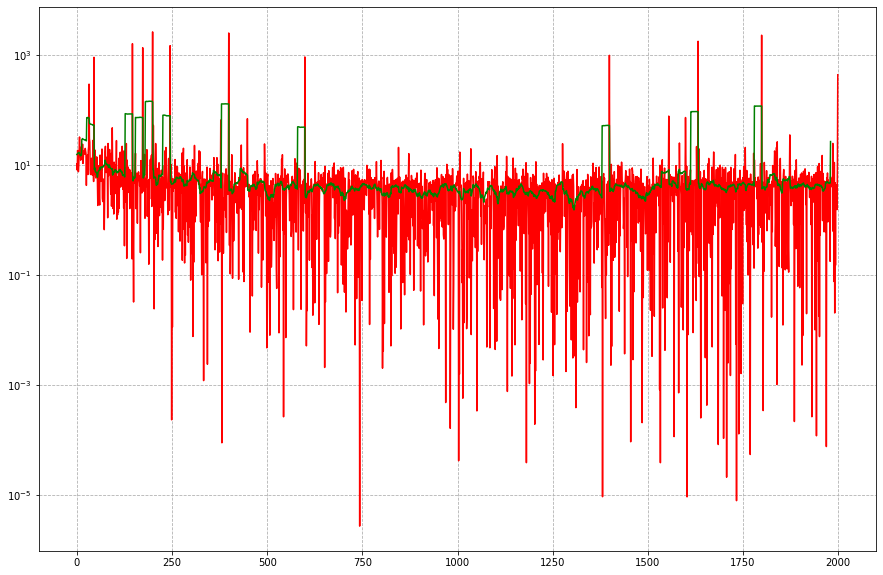

In [47]:
# test on training data
NumberOfElements = 20
AverageCost = moving_average(J, n=NumberOfElements)# here i compute the moving average of the cost vector J
AAAA = np.ones(NumberOfElements)

#_,ax = plt.subplots()
plt.rcParams['figure.figsize'] = [15, 10]# in this way you set the size of the plot
plt.plot(range(max_iters), J, color='r', label='J')
plt.plot(range(len(AverageCost)), AverageCost, color='g', label='avg(J)')
#plt.grid()
plt.grid(True,which="both", linestyle='--')
plt.yscale("log")
plt.show()

Shape of the solutions propagationa (4, 784)
label_point :-1
NN concensus mean: -0.9533319040161913
NN concensus First: -0.9999999999999929


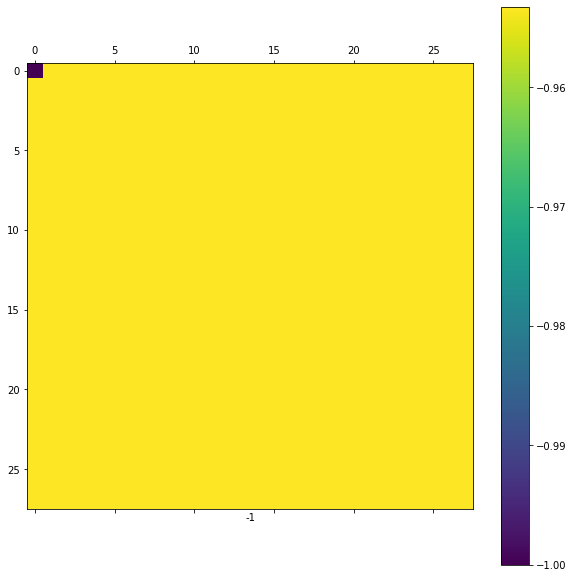

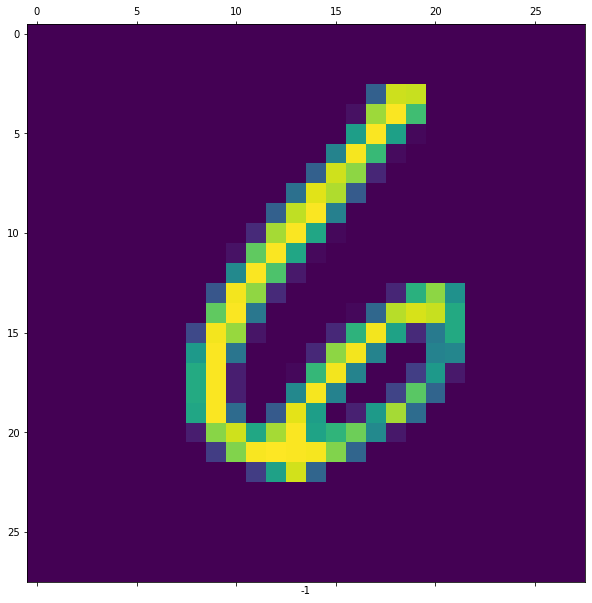

In [21]:
# test on external data ( non training)
#SrecchedDatasetX
#y_test
mm = 406
xx = forward_pass(uu, SrecchedDatasetX[mm])
print("Shape of the solutions propagationa {0}".format(np.shape(xx)))
#print("Predicted solution {0}".format(xx[-1][:]))
print("label_point :{0}".format(y_train[mm]))
print("NN concensus mean: {0}".format(np.mean(xx[-1][:])))
print("NN concensus First: {0}".format(np.mean(xx[-1][0])))

prova = np.reshape(xx[-1], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.colorbar()# i want to have the gradueted bar with colors
plt.grid(False)# i dont want to have a grid on the image
plt.xlabel(y_train[mm])# write the number on the photo on x axis
plt.show()

# HERE I TEST THE CONVERSION GOING BACKWARD (CHEKING IF THE IMAGE IS CORRECT)
#print(SrecchedDatasetX[1])
prova = np.reshape(SrecchedDatasetX[mm], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.xlabel(y_train[mm])
plt.show()

# UNTILL HERE THE CODE IS CORRECT <-------------------------------------------------------------- OK

In [22]:
np.shape(ZeroVector)

(785,)

In [23]:
np.shape(xx)

(4, 784)

In [24]:
np.shape(uu)

(3, 784, 785)

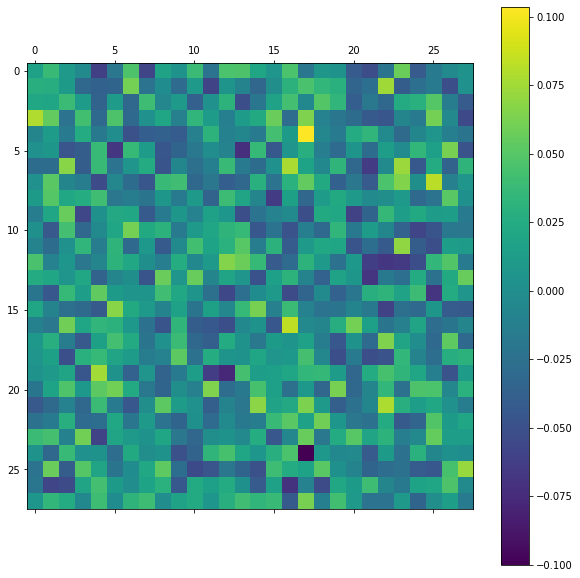

In [25]:
AAAA = uu[2][90][1:785]
prova = np.reshape(AAAA, (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.colorbar()
plt.grid(False)
plt.show()

Shape of the solutions propagationa (4, 784)
label_point :1.0
NN concensus: 0.9559726230748378


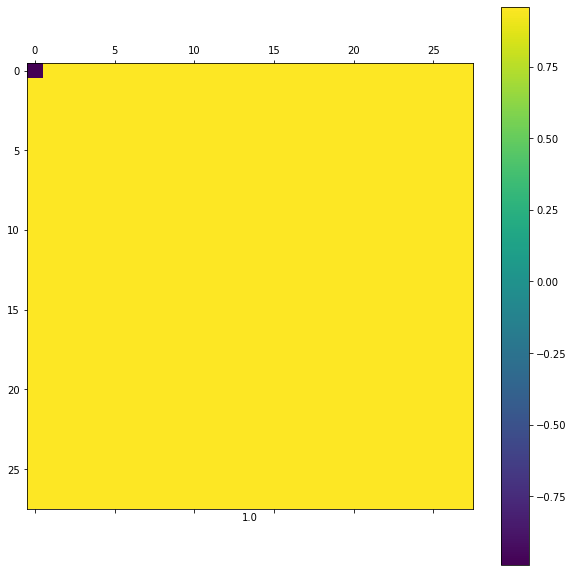

In [26]:
mm = 0
xx = forward_pass(uu,data_point[mm])
print("Shape of the solutions propagationa {0}".format(np.shape(xx)))
#print("Predicted solution {0}".format(xx[-1][:]))
print("label_point :{0}".format(label_point[mm]))
print("NN concensus: {0}".format(np.mean(xx[-1][:])))

prova = np.reshape(xx[3], (28, 28))# here at index you can put whatewer number you wish to see if the conversion went correctly
plt.matshow(prova)
plt.colorbar()# i want to have the gradueted bar with colors
plt.grid(False)# i dont want to have a grid on the image
plt.xlabel(label_point[mm])# write the number on the photo on x axis
plt.show()

In [27]:
#dir(np)

In [28]:
################################################################################################################
#print(np.shape(uu))
#data = np.asarray([np.reshape(uu, 3*784*785)])
#print(np.shape(data))
#data2 = np.asarray([np.reshape(uu, [3, 784, 785])])
#print(uu-data2)
#np.savetxt('uu_matrix1.csv', data, delimiter=':')

In [29]:
#data10 = np.asarray([J])
#np.savetxt('J_vector1.csv', data10, delimiter=':')

In [30]:
#prova = np.loadtxt(fname = 'J_vector.csv', delimiter=':')
#print(np.shape(prova))
#################################################################################################################

In [31]:
#dir(np)

In [32]:
uu = np.random.randn(T-1, d, d+1)

In [33]:
np.shape(uu)

(3, 784, 785)

[-0.9999999958776926, -0.9999999695400409, -0.999999774929676, -0.9999983369439447, -0.9999877116507956, -0.999909204262595, -0.9993292997390669, -0.9950547536867306, -0.964027580075817, -0.7615941559557649, 0.0, 0.7615941559557649, 0.964027580075817, 0.9950547536867306, 0.9993292997390669, 0.999909204262595, 0.9999877116507956, 0.9999983369439447, 0.999999774929676, 0.9999999695400409]


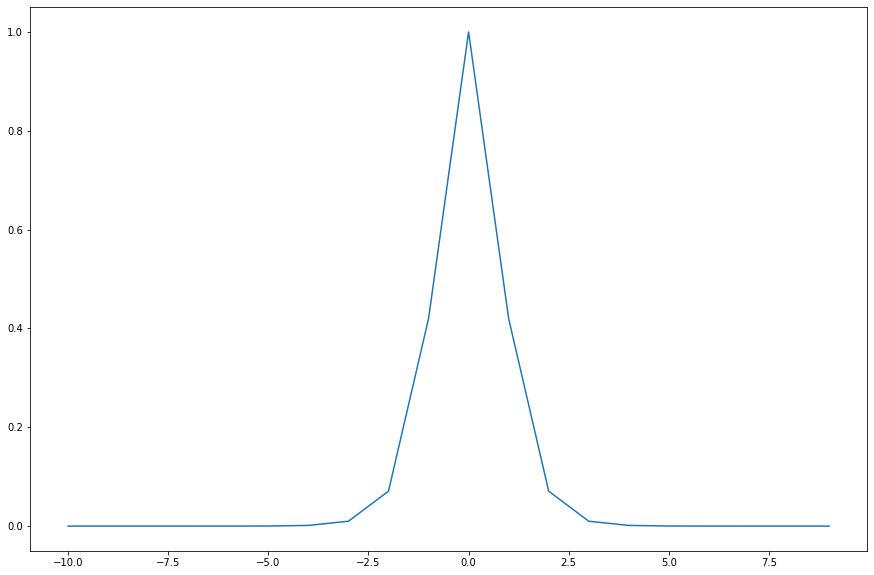

In [34]:
lista = []
lista2 = []
iteratore = []
for i in range(-10, 10, 1):
    lista.append(sigmoid_fn(i))
    lista2.append(sigmoid_fn_derivative(i))
    iteratore.append(i)
print(lista)


plt.plot(iteratore, lista2)
plt.show()

[-1.0, -0.9, -0.8, -0.7000000000000001, -0.6000000000000001, -0.5, -0.4, -0.30000000000000004, -0.2, -0.1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


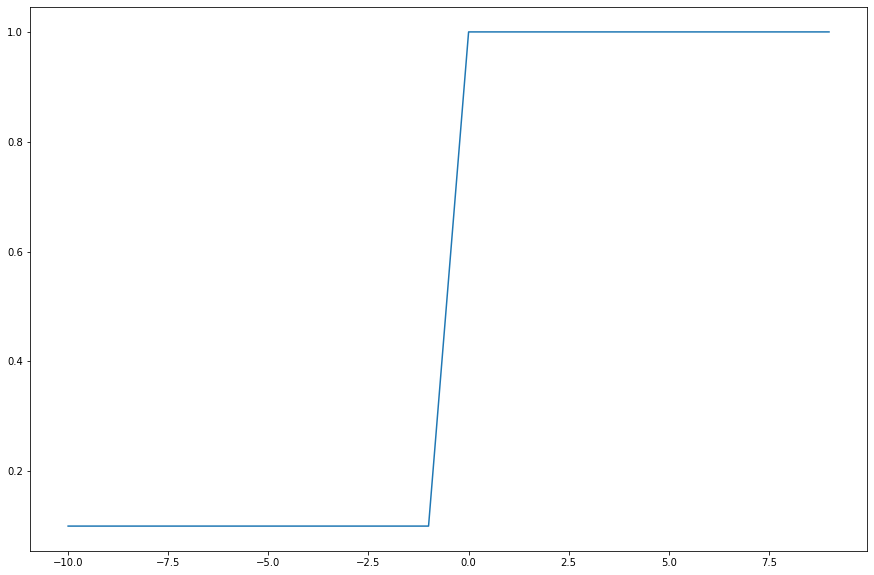

In [35]:
def ReluPlus(xi):
    if xi>=0:
        return xi
    else:
        return 0.1*xi

def ReluPlus_derivative(xi):
    if xi>=0:
        return 1
    else:
        return 0.1
    
listaaaa = []
listaaaa2 = []
iteratore = []
for i in range(-10, 10, 1):
    listaaaa.append(ReluPlus(i))
    listaaaa2.append(ReluPlus_derivative(i))
    iteratore.append(i)
print(listaaaa)
print(listaaaa2)

plt.plot(iteratore, listaaaa2)
plt.show()

In [36]:
#dir(tf.keras.layers)

[-0.9999999958776926, -0.9999999695400409, -0.999999774929676, -0.9999983369439447, -0.9999877116507956, -0.999909204262595, -0.9993292997390669, -0.9950547536867306, -0.964027580075817, -0.7615941559557649, 0.0, 0.7615941559557649, 0.964027580075817, 0.9950547536867306, 0.9993292997390669, 0.999909204262595, 0.9999877116507956, 0.9999983369439447, 0.999999774929676, 0.9999999695400409]
[8.244614455767397e-09, 6.091991712323228e-08, 4.5014059756372915e-07, 3.326109344901086e-06, 2.4576547405332702e-05, 0.00018158323094380667, 0.0013409506830258967, 0.00986603716544019, 0.07065082485316448, 0.41997434161402614, 1.0, 0.41997434161402614, 0.07065082485316448, 0.00986603716544019, 0.0013409506830258967, 0.00018158323094380667, 2.4576547405332702e-05, 3.326109344901086e-06, 4.5014059756372915e-07, 6.091991712323228e-08]


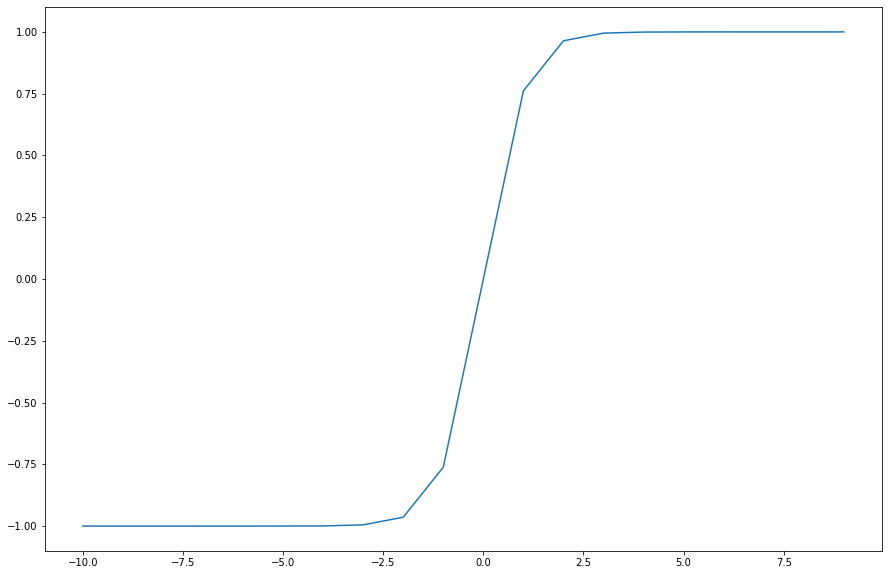

In [37]:
def tanh(xi):
    return (np.exp(xi) - np.exp(-xi)) / (np.exp(xi) + np.exp(-xi))

def tanh_derivative(xi):
    return (2/(np.exp(xi)+np.exp(-xi)))**2
    
listaaaa = []
listaaaa2 = []
iteratore = []
for i in range(-10, 10, 1):
    listaaaa.append(tanh(i))
    listaaaa2.append(tanh_derivative(i))
    iteratore.append(i)
print(listaaaa)
print(listaaaa2)

plt.plot(iteratore, listaaaa)
plt.show()

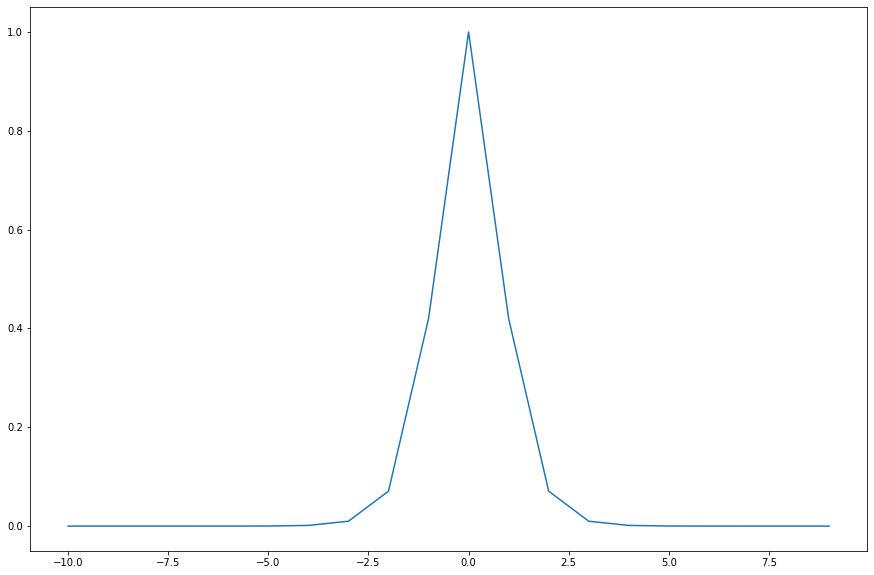

In [38]:
plt.plot(iteratore, listaaaa2)
plt.show()

In [39]:
#https://stackoverflow.com/questions/39561560/getting-gradient-of-model-output-w-r-t-weights-using-keras

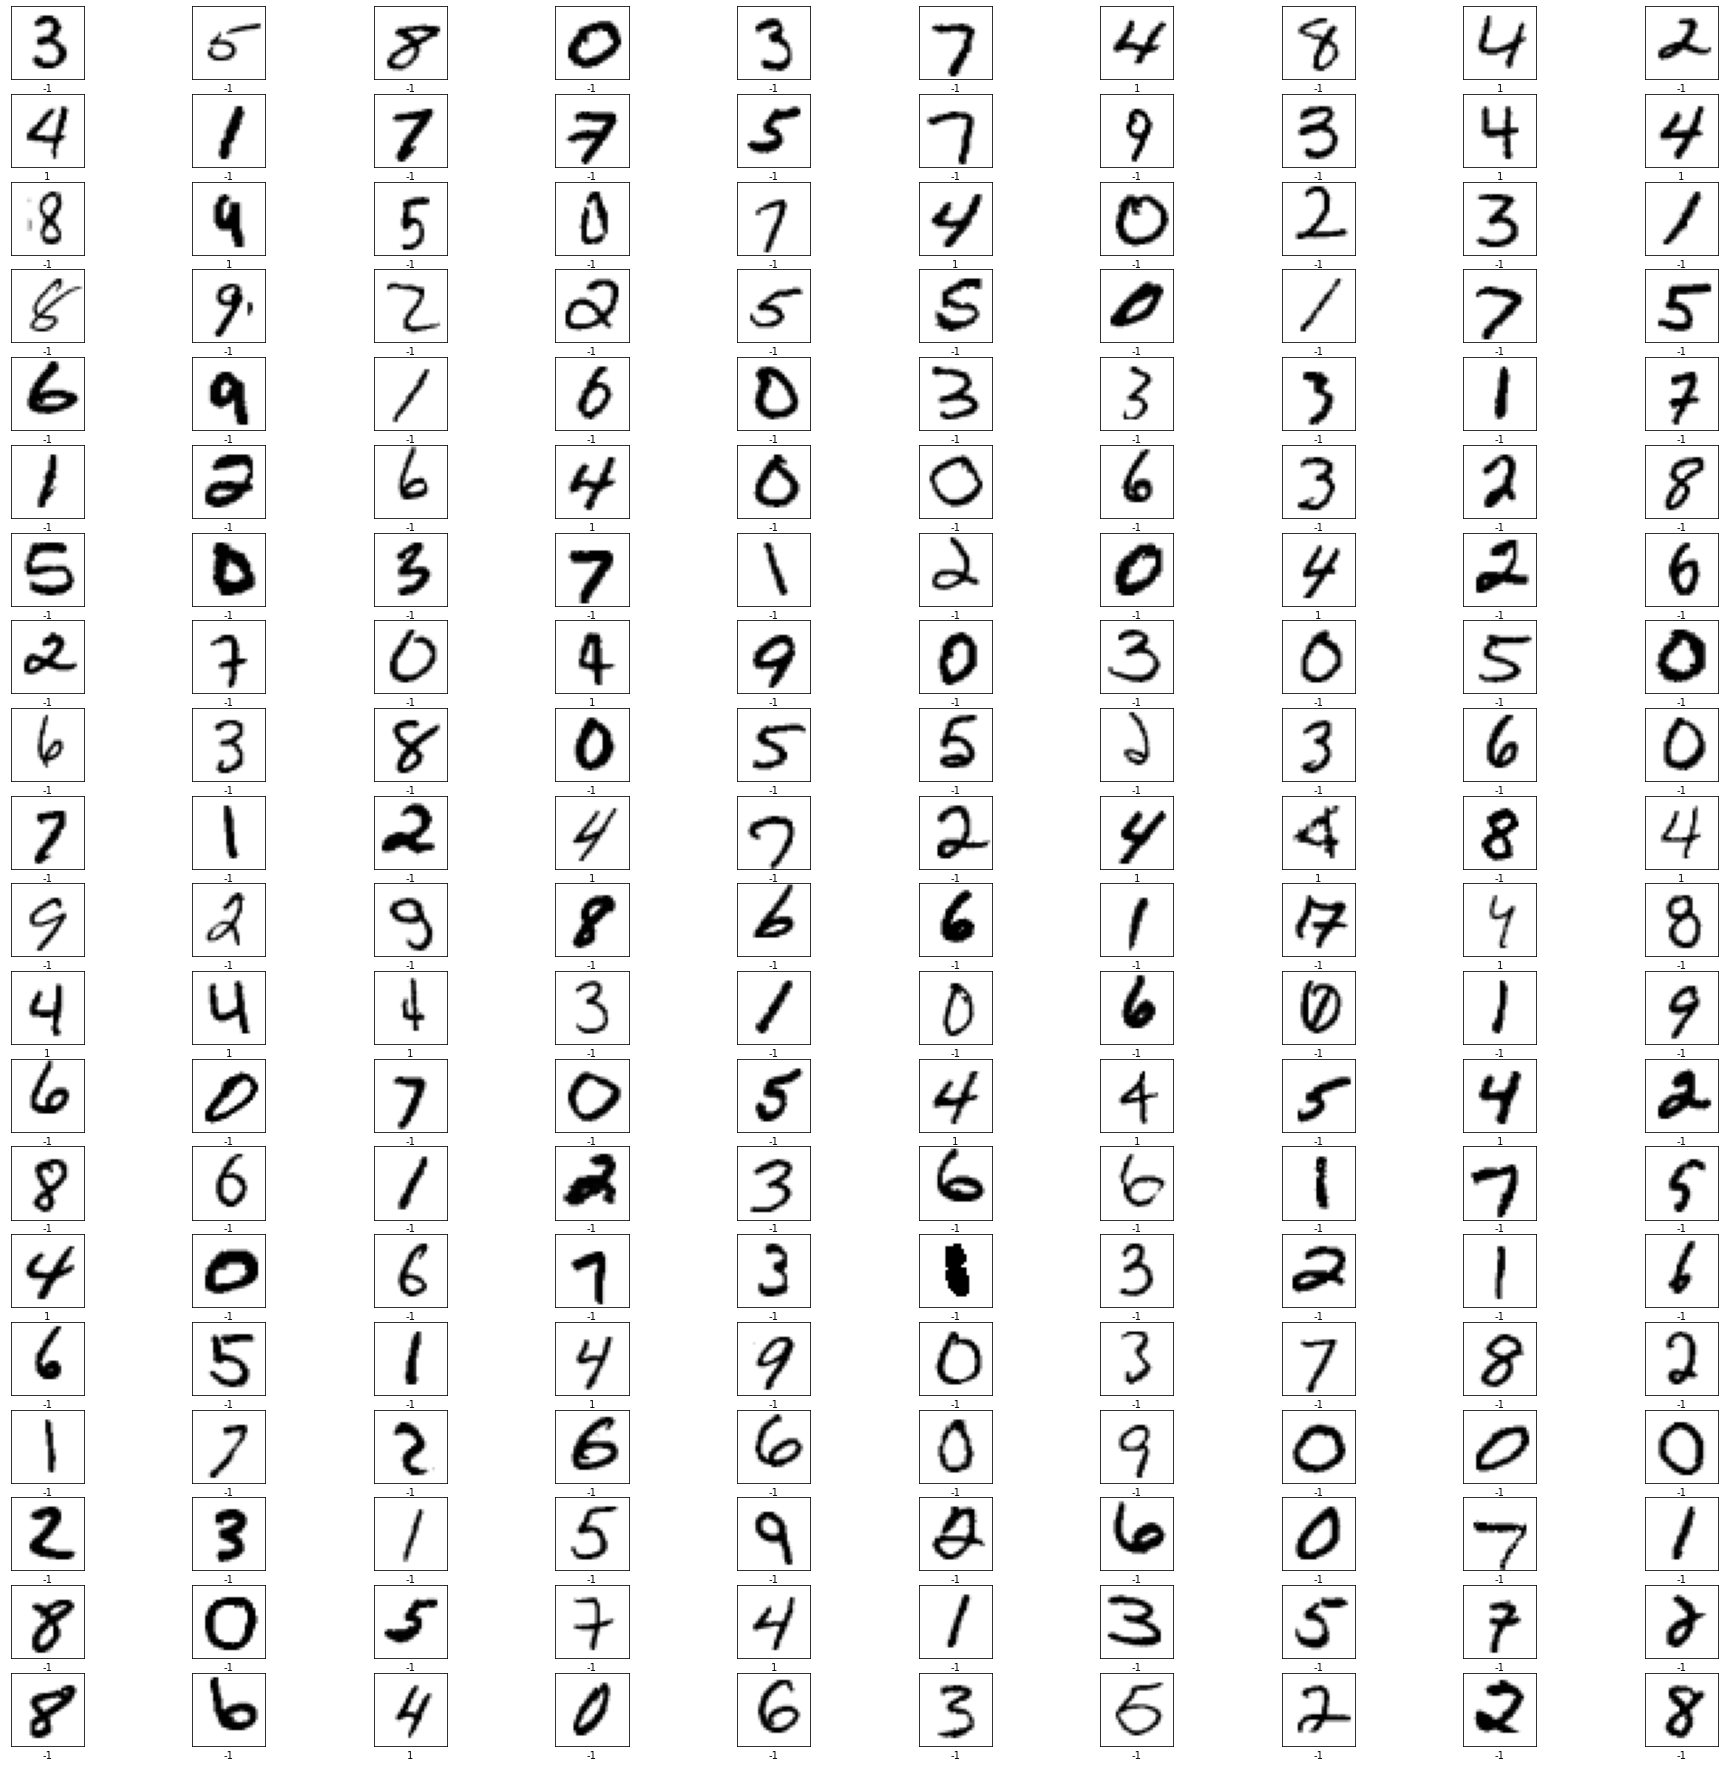

In [40]:
# HERE I RESHAPE THE IMAGES FROM A MATRIX TO A VECTOR MANTAINING THE DATA CONTENT (for validation data)
StrecchedValidationDataset = np.reshape(x_test, (np.shape(x_test)[0], 784))
# this vector contains linearized images for validation of the neural network
# "y_test" contains the lables of the test set

# display the first 25 training images with labels and verify that the data is in the correct formate.
plt.figure(figsize=(32,32))# <--------------------------------------------------------------------------- UNKNOWN
for i in range(200):# i want to plot 25 images
    plt.subplot(20,10,i+1)# the letter "i" rappresent the position 
    plt.xticks([])# <------------------------------------------------------------------------------------ UNKNOWN
    plt.yticks([])
    plt.grid(False)# in this way i will not have the grid in on the images
    plt.imshow(np.reshape(StrecchedValidationDataset[i], (28, 28)), cmap=plt.cm.binary)# load the image and make it show black and white
    plt.xlabel(y_test[i])# add the lable associated to that image under it
plt.show()# show all the images

In [41]:
def ValidationFunction(uu: np.array, VectoryzedImagesTestArray: np.array, LablesTestArray: np.array, NumberOfEvaluations = 100, fringe = 0.5):
    """    1 -> the prediction is correct
           0 -> the prediction is wrong
           #-1 -> the prediction is unsure (score to low)
    """
    VectorOfEstimation = -np.ones(NumberOfEvaluations)
    for i in range(NumberOfEvaluations):
        xx = forward_pass(uu, VectoryzedImagesTestArray[i])# here i move forward the image in the neural network
        prediction = np.mean(xx[-1][:])# here i compute the avarege of the resoults of neural network
        
        if (prediction >= fringe) and (LablesTestArray[i] == 1):
            VectorOfEstimation[i] = 1
        if ((prediction >= fringe) and (LablesTestArray[i] == -1)) or (prediction < fringe) and (LablesTestArray[i] == 1):
            VectorOfEstimation[i] = 0

        if (prediction <= -fringe) and (LablesTestArray[i] == -1):
            VectorOfEstimation[i] = 1
        if ((prediction <= -fringe) and (LablesTestArray[i] == 1)) or (prediction > -fringe) and (LablesTestArray[i] == -1):
            VectorOfEstimation[i] = 0
    unique, counts = np.unique(VectorOfEstimation, return_counts=True)
    Resoult = dict(zip(unique, counts))
    return Resoult

In [42]:
samples = 1000
Dictionary = ValidationFunction(uu, StrecchedValidationDataset, y_test, samples, 0)

In [43]:
print(Dictionary)
print("The accuracy is {}".format(Dictionary[1.0]/samples))

{0.0: 695, 1.0: 305}
The accuracy is 0.305


In [44]:
mm= 8
xx = forward_pass(uu, StrecchedValidationDataset[mm])# here i move forward the image in the neural network
prediction = np.mean(xx[-1][:])
print("\nThe prediction is {} while the lable is {}".format(prediction, y_test[mm]))


The prediction is 0.06780150331338033 while the lable is 1


In [45]:
#https://realpython.com/python-exceptions/